In [ ]:
# This notebook follows the first part of the this tutorial: https://towardsdatascience.com/creating-beautiful-river-maps-with-python-37c9b5f5b74c

In [5]:
import geopandas as gpd

In [6]:
africa_rivers = gpd.read_file("africa/afrivs.shp")
# store africa rivers shapefile as dataframe
# data source: http://gaia.geosci.unc.edu/rivers/

In [14]:
print(africa_rivers.head(3))
# print first 3 rows of africa_rivers dataframe

   cat   AREA  UP_CELLS  DISCHARGE  WIDTH  WIDTH5  WIDTH95  DEPTH  DEPTH5  \
0    1  24.56       142       0.55   5.32    1.94    14.74   0.21    0.10   
1    2  34.98       199       0.79   6.38    2.32    17.81   0.25    0.11   
2    3  97.00       566       2.25  10.80    3.84    30.78   0.37    0.16   

   DEPTH95  ARCID                                           geometry  
0     0.49      1  LINESTRING (9.80417 37.31250, 9.81042 37.31875...  
1     0.57      2  LINESTRING (9.75833 37.27083, 9.76458 37.26458...  
2     0.87      4  LINESTRING (9.39792 37.21458, 9.40625 37.22292...  


In [30]:
lakes = gpd.read_file("ne_10m_lakes/ne_10m_lakes.shp")
# save lakes shapefile as dataframe
# data source: https://www.naturalearthdata.com/downloads/10m-physical-vectors/
# dataset is called "Lakes + Reservoirs"

print(lakes.head(3))
# view lakes dataframe

  featurecla  scalerank      name  name_abb name_alt  note  \
0       Lake          9   Eğirdir   Egridir     None  None   
1       Lake          7  Beyşehir  Beysehir     None  None   
2       Lake          5  Engozero  Engozero     None  None   

                            delta dam_name  year admin  ...   name_tr  \
0  New or modified in version 1.2     None   -99  None  ...   Eğirdir   
1  New or modified in version 1.2     None   -99  None  ...  Beyşehir   
2  New or modified in version 1.2     None   -99  None  ...  Engozero   

       name_vi name_zh       ne_id  name_fa      name_he   name_uk    name_ur  \
0      Eğirdir  埃伊尔迪尔湖  1159106675  اگیردیر  אגם אאירדיר   Егридир     ایگردر   
1     Beyşehir  貝伊謝希爾湖  1159106685   بیسهیر  אגם ביישהיר  Бейшехір      بےسحر   
2  Hồ Engozero   恩戈澤羅湖  1159106693  انگوزرو      אנגוזרו  Енгозеро  اینگوزیرو   

  name_zht                                           geometry  
0   埃伊爾迪爾湖  POLYGON ((30.80977 38.27069, 30.86011 38.28099...  
1   貝

In [11]:
country_shapefiles = gpd.read_file("ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
# save countries shapefile as dataframe
# data source: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
# dataset is called "Admin 0 – Countries"

In [29]:
print(country_shapefiles.head(3)) 
# print first 3 rows

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   

                TYPE      ADMIN ADM0_A3  ...  FCLASS_TR FCLASS_ID FCLASS_PL  \
0  Sovereign country  Indonesia     IDN  ...       None      None      None   
1  Sovereign country   Malaysia     MYS  ...       None      None      None   
2  Sovereign country      Chile     CHL  ...       None      None      None   

   FCLASS_GR FCLASS_IT FCLASS_NL  FCLASS_SE FCLASS_BD FCLASS_UA  \
0       None      None      None       None      None      None   
1       None      None      None       None      None      None   
2       None      None      None       None      None      None   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16341, 117.

In [28]:
column_names = country_shapefiles.columns.values.tolist()
# print(column_names)
# get countries dataframe column names

In [20]:
continents_list = country_shapefiles.CONTINENT.unique()
print(continents_list)
# get list of unique values for CONTINENT column

['Asia' 'South America' 'Africa' 'Europe' 'North America' 'Oceania'
 'Antarctica' 'Seven seas (open ocean)']


In [24]:
africa = country_shapefiles.loc[country_shapefiles['CONTINENT']=='Africa']
# save only africa data

In [66]:
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
print('Number of lakes in Africa: ', africa_lakes.name.nunique()) # get number of unique lakes by name
print(africa_lakes['name'].head(10)) # view first 10 names of lake

africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')

africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]


Number of lakes in Africa:  52
475        Lake Albert
477    Lake Tanganyika
491          Lac Moeru
502          Lake Kivu
503        Lake Edward
564          Lac Tumba
699     Lac Mai-Ndombe
700      Lake Rentenue
756         Lac Upemba
475        Lake Albert
Name: name, dtype: object


In [68]:
print('excl rivers ', excluded_rivers.head(3))


excl rivers  Empty GeoDataFrame
Columns: [cat, AREA, UP_CELLS, DISCHARGE, WIDTH, WIDTH5, WIDTH95, DEPTH, DEPTH5, DEPTH95, ARCID, geometry, index_right, featurecla, scalerank, name, name_abb, name_alt, note, delta, dam_name, year, admin, min_zoom, min_label, label, wikidataid, name_ar, name_bn, name_de, name_en, name_es, name_fr, name_el, name_hi, name_hu, name_id, name_it, name_ja, name_ko, name_nl, name_pl, name_pt, name_ru, name_sv, name_tr, name_vi, name_zh, ne_id, name_fa, name_he, name_uk, name_ur, name_zht]
Index: []

[0 rows x 54 columns]


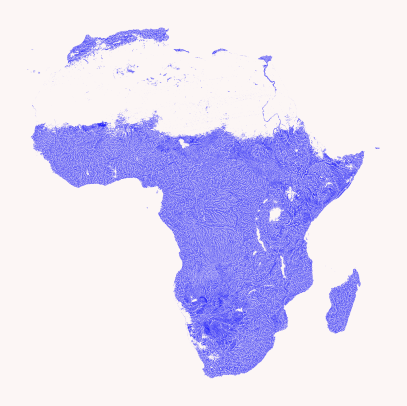

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)
africa_rivers.plot(ax=ax, color='blue', lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')

plt.show()
# plot the rivers without the lakes